# pyArgus
## Demonstation and documentation for the beamformer algorithms

License: GPLv3

Version: 1.0

Author: Tamás Pető

In [2]:

#sys.path

['C:\\BasicApplication\\pyCharm\\PyCharm 2022.1.3\\plugins\\python\\helpers-pro\\jupyter_debug',
 'C:\\BasicApplication\\pyCharm\\PyCharm 2022.1.3\\plugins\\python\\helpers\\pydev',
 'C:\\WT_WORK\\博士课题：TK一体化\\代码储存\\5、Antenna array signal processing library implemented in python\\pyArgus',
 'C:\\WT_WORK\\博士课题：TK一体化\\代码储存\\5、Antenna array signal processing library implemented in python',
 'C:\\BasicApplication\\Anaconda\\python311.zip',
 'C:\\BasicApplication\\Anaconda\\DLLs',
 'C:\\BasicApplication\\Anaconda\\Lib',
 'C:\\BasicApplication\\Anaconda',
 '',
 'C:\\BasicApplication\\Anaconda\\Lib\\site-packages',
 'C:\\BasicApplication\\Anaconda\\Lib\\site-packages\\win32',
 'C:\\BasicApplication\\Anaconda\\Lib\\site-packages\\win32\\lib',
 'C:\\BasicApplication\\Anaconda\\Lib\\site-packages\\Pythonwin',
 'C:\\WT_WORK\\博士课题：TK一体化\\代码储存\\5、Antenna array signal processing library implemented in python\\pyArgus\\pyArgus']

In [16]:
# Import pyArgus source files
from pyargus.antennaArrayPattern import array_rad_pattern_plot
import pyargus.beamform as bf
import tests.beamformTest as bft
# from pyargus.tests.patternPlotTest import demo_ULA_plot, demo_UCA_plot

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pyArgus beamformer module implements a number of different beamforming algorithms. The complete list of the algorithms is the following.

Fixed beamformers:
- Maximum Signal to Interference Ratio beamformer
- Maximum Signal to Interference Ratio beamformer with Godara's method

Adaptive beamformer:
- Optimum Wiener beamformer (with known signal of interest direction)
- MSINR with known covariance matrices
- MMSE with known signal of interest

Note that Maximum Signal to Interference plus Noise Ratio (MSINR), Minimum Mean Square Error (MMSE), Minimum Variance Distortionless Respone (MVDR), Maximum Likelihood (ML) optimization criterias lead to the same solution excepting a scalar scaling value. This solution is implemented as the optimum Wiener beamformer. For more detailes see [1].




## Fixed beamformers

### MSIR bemformer

In order to calculate the beampattern the incident angles of the interference sources must be known preliminiary. From these angles the array response matrix $\textbf{A}$ is created. Beside this, we must decide what response is required from the antenna system in the direction of these interference sources. This values is often selected to zero, thus we want to supress these interferences. These values are stored in the $\textbf{u}$ constraint vector. Then the $\textbf{w}$ coefficient vector can be calculated as follows [2]:
为了计算 Beampattern，必须预先知道干扰源的入射角。根据这些角度创建阵列响应矩阵 $textbf{A}$。除此之外，我们还必须确定在这些干扰源的方向上天线系统需要做出怎样的响应。这个值通常选择为零，因此我们希望抑制这些干扰。这些值存储在 $\textbf{u}$ 约束向量中。然后，$\textbf{w}$ 系数向量的计算方法如下[2]：

$$\textbf{w}_{MSIR}^H = \textbf{u} \textbf{A}^{-1}$$

The "fixed_max_sir_beamform" function implements this algorithm. Let us demonstrate its operation:
fixed_max_sir_beamform "函数实现了这一算法。让我们演示一下它的操作：


[[ 1.        +1.92367069e-16j -0.99886124+4.77097333e-02j
  -0.43368692+9.01063626e-01j -0.74183541-6.70582006e-01j]
 [ 1.        +3.84734139e-16j  0.99544756-9.53108070e-02j
  -0.62383132-7.81559012e-01j  0.10063955+9.94922953e-01j]
 [ 1.        +5.77101208e-16j -0.98976674+1.42694809e-01j
   0.97478188-2.23159790e-01j  0.59251945-8.05556143e-01j]
 [ 1.        +7.69468277e-16j  0.9818317 -1.89753821e-01j
  -0.22166898+9.75121974e-01j -0.97974336+2.00257187e-01j]]


array([-44.81299922, -44.81384955, -44.81639861, ..., -44.81639861,
       -44.81384955, -44.81299922])

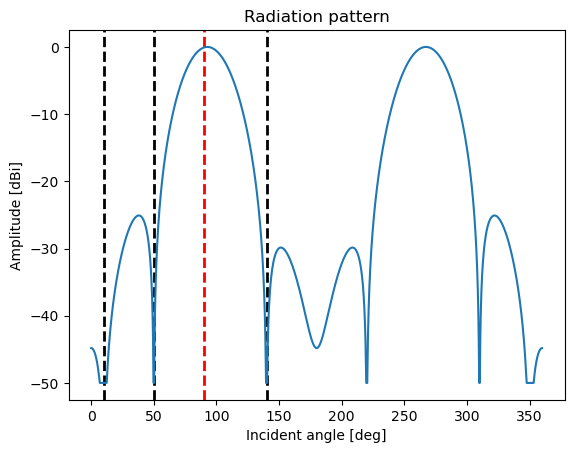

In [22]:
# Incident angle of the signal of interest is: 130 [deg]
# Incident angle of interferences are: 50,60,70 [deg]
# 这段代码用于计算并展示最大信干比波束形成的过程和结果。
par_angles = np.array([90, 10, 50, 140])  # Incident angle definition 信号感兴趣的入射角是130度，干扰信号的入射角为50度、60度和70度
par_constraints = np.array([1, 0, 0, 0]).reshape(4,1)  # Constraint vector definition 由约束向量构成的数组，用于描述问题约束
par_array_alignment = np.array([0.5, 1, 1.5, 2])  # Vector used to describe the antenna system 用于描述天线系统的数组 应该是天线位置

w_maxsir = bf.fixed_max_sir_beamform(par_angles, par_constraints, par_array_alignment)  # Calculate coefficients 函数计算了最大信干比波束形成的系数

# Plot the obtained beampattern 创建了绘图对象 figure 和子绘图对象 ax
figure = plt.figure()        
ax = figure.add_subplot(111)

# mark incident angles on the figure 在图中用虚线标记了入射角度
ax.axvline(linestyle = '--',linewidth = 2,color = 'r',x = 90)
ax.axvline(linestyle = '--',linewidth = 2,color = 'black',x = 10)
ax.axvline(linestyle = '--',linewidth = 2,color = 'black',x = 50)
ax.axvline(linestyle = '--',linewidth = 2,color = 'black',x = 140)

array_alignment = np.array(([0.5, 1, 1.5, 2],[0, 0, 0, 0]))# 包含天线系统对齐信息的数组 array_alignment
array_rad_pattern_plot(w=w_maxsir, array_alignment = array_alignment, axes=ax)
#调用了 array_rad_pattern_plot 函数绘制了波束形成图，传入了波束系数 w_maxsir 和天线数组对齐信息。

The previously introduced beamformer can be applied only when the number of specified constraints is equal with the number antenna elements in the antenna system. In case it is not true, Godara's method may be applied.
只有当指定约束条件的数量与天线系统中的天线元件数量相等时，才能使用之前介绍的波束成形器。如果情况并非如此，则可以使用 Godara 方法。

$$\textbf{w}_{Godara} =  \textbf{u} \textbf{A}^{H} \left(\textbf{A} \textbf{A}^H + \sigma \textbf{I} \right)^{-1}$$

In the demonstration below, we have a quad channel linear antenna array. The number of interferences are less than the number of antenna elements so we can use Godara's method to deal with the interferences.
在下面的演示中，我们有一个四通道线性天线阵列。干扰的数量少于天线元件的数量，因此我们可以使用 Godara 方法来处理干扰。

array([-50., -50., -50., ..., -50., -50., -50.])

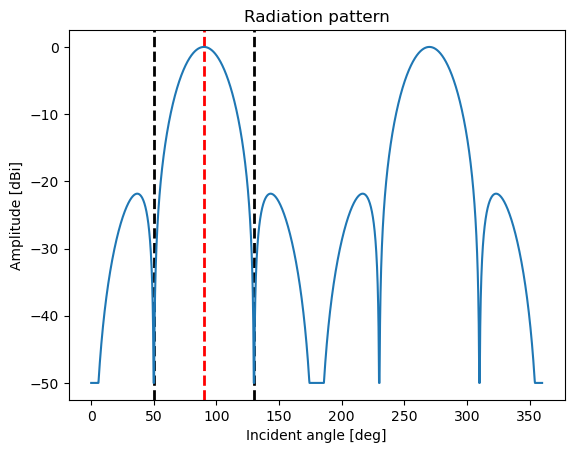

In [23]:
angles      = np.array([90,50,130])
constraints = np.array([1,0,0])
array_alignment = np.array([0.5, 1, 1.5, 2])

# Calculate coefficient vector
w_Godara_maxsir = bf.Goadar_max_sir_beamform(angles, constraints, array_alignment) 

# Plot the obtained beampattern
figure = plt.figure()        
ax = figure.add_subplot(111)

# mark incident angles on the figure
ax.axvline(linestyle = '--',linewidth = 2,color = 'r',x = 90)
ax.axvline(linestyle = '--',linewidth = 2,color = 'black',x = 50)
ax.axvline(linestyle = '--',linewidth = 2,color = 'black',x = 130)

p_array_alignment = np.array(([0.5, 1, 1.5, 2],[0, 0, 0, 0]))
array_rad_pattern_plot(w = w_Godara_maxsir, array_alignment = p_array_alignment, axes =ax) 


# Adaptive beamformers

## MSINR (Maximum Signal to Noise Ratio)

The MSINR beamformer in its direct form use the spatial autocorrelation matrix of the signal of interest and the autocorrelation matrix of the interference sources to calculate the optimal weight coefficients. 
Note that in most practical cases these matrices are not available as the singal of interest and the interferences can not be separated.

The optimal coefficient vector in the Maximum Signal to Noise Ratio sense is equal with eigenvector belongs to the larges eigenvalue of the $\textbf{B}$ matrix.
MSINR 波束成形器直接使用相关信号的空间自相关矩阵和干扰源的自相关矩阵来计算最佳权系数。
需要注意的是，在大多数实际情况下，这些矩阵是不可用的，因为相关信号和干扰源无法分离。

最大信噪比意义上的最优系数向量等于属于 $\textbf{B}$ 矩阵最大特征值的特征向量。

$$\textbf{B} = \textbf{R}_{\nu\nu} \textbf{R}_{s}$$,
where $\textbf{R}_{\nu\nu}$ is the autocorrelation matrix of the noise plus interferences, while $\textbf{R}_{s}$ denotes the autocorrelation matrix of the signal of interest.

The following demonstration presents the operation of the MSINR beamformer.
下面的演示将介绍 MSINR 波束成形器的运行情况。

Signal to interference and noise ratio : 3590.101612361363


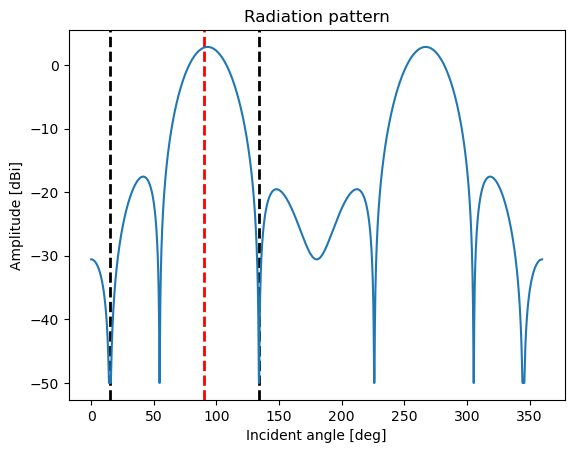

In [25]:
# 定义了信号的入射角度 theta_soi 以及干扰信号的入射角度 theta_interf。
theta_soi = 90  # Incident angle of the signal of interest
theta_interf = np.array([15,134])  # Incident angles of the interferences
# 设置了噪声方差 Pnoise、天线元素之间距离 d、天线元素数量 N。
Pnoise   = 0.001              # noise variance  
d        = 0.5                # distance between antenna elements [lambda]
N        = 4                  # number of antenna elements

i = np.arange(N)

# Create array response vector for SOI 创建了用于信号自相关矩阵 Rss 的信号阵列响应向量 aS，以及用于干扰信号自相关矩阵 Rnunu 的干扰信号阵列响应向量 aI。
aS = np.exp(i*1j*2*np.pi*d*np.cos(np.deg2rad(theta_soi))) 
aS = np.matrix(aS).reshape(N,1)
# Create SOI autocorrelation matrix 计算了信号自相关矩阵和干扰信号自相关矩阵。
Rss = aS * aS.getH() 

# Create interference autocorrelation matrix 创建了噪声自相关矩阵
Rnunu = np.matrix(np.zeros((N,N)))

for k in np.arange(np.size(theta_interf)):    
    aI = np.exp(i*1j*2*np.pi*d*np.cos(np.deg2rad(theta_interf[k])))  
    aI = np.matrix(aI).reshape(N,1)

    # Create interference autocorrelation matrix ( interferece signals are not correlated )
    # 将干扰信号自相关矩阵和噪声自相关矩阵相加得到噪声加干扰信号自相关矩阵
    Rnunu = Rnunu + aI * aI.getH()

# Create noise autocorrelation matrix

Rnn = np.matrix(np.eye(N)) * Pnoise

# Create noise + interferences autocorr matrix (interferences and thermal noise are not correlated)    
Rnunu = Rnunu + Rnn

# 绘制了相关的图形，标记了信号和干扰信号的入射角度。
# a figure instance to plot on
figure = plt.figure()

# create an axis
ax = figure.add_subplot(111)

# mark incident angles on the figure
ax.axvline(linestyle = '--',linewidth = 2,color = 'r',x = theta_soi)

for k in np.arange(np.size(theta_interf)):
    ax.axvline(linestyle = '--',linewidth = 2,color = 'black',x = theta_interf[k])


#Calculate MSINR solution
# 使用 MSINR（最大信干比）算法计算了波束形成权重 w_msinr 以及信干比 SINR。
SINR,w_msinr = bf.MSINR_beamform(Rss,Rnunu)
w_msinr /= np.sqrt(np.dot(w_msinr,w_msinr.conj()))
# 根据计算得到的波束形成权重绘制了阵列的方向图，并打印出信干比。
p_array_alignment = np.array(([0.5, 1, 1.5, 2],[0, 0, 0, 0]))
pattern = array_rad_pattern_plot(w = w_msinr,axes = ax, array_alignment = p_array_alignment) 
print('Signal to interference and noise ratio :',np.abs(SINR))     

This demo is also wrapped into the "demo_msinr()" function where the incident angles can also be configured.

Signal to interference and noise ratio : 3314.3462966524116


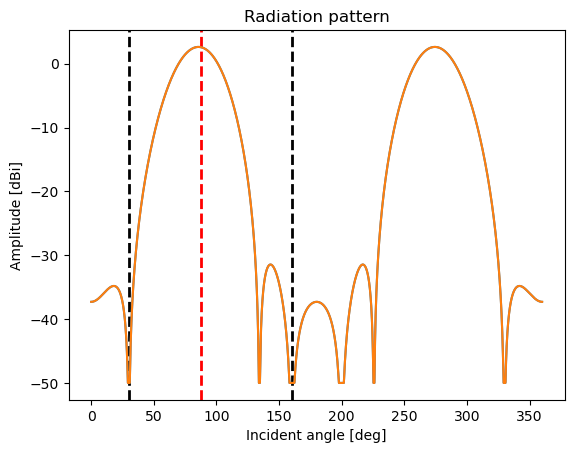

In [27]:
theta_soi = 88
theta_interf = np.array([30,160])
bft.demo_msinr(theta_soi, theta_interf)

## References

- [1] http://www.cwc.oulu.fi/nrs04/slides/mimo_BF&AA.pdf
- [2] Frank B Gross: Smart Antennas with MATLAB, 2nd edition, 2015